# Dyna RL - effect of outcome stochasticity when isolating early!

### Model assumes DYNA offline learning initiates during "rest from the world" under isolation

C:\Users\sharp\AppData\Local\Temp\ipykernel_12116\4057313842.py:108: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  ax = sns.lineplot(


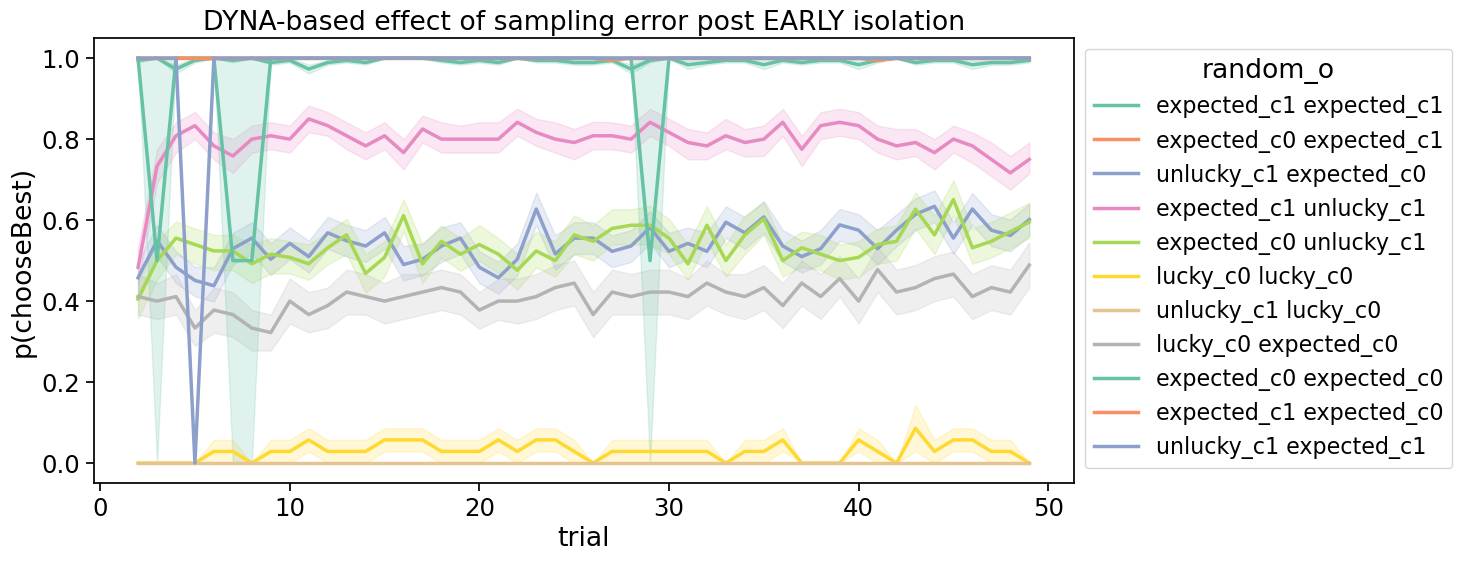

In [142]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.special import logsumexp as smax
import seaborn as sns
import matplotlib.pyplot as plt

probabilities=[0.3,0.6]


trials=50 #online
dyna_trials=1000 #offline
episodes=1000 #episodes
replay_trials=[2] #trial at which isolation + DYNA offline learning begins
inv_temp=5

sns.set_context("notebook",font_scale=1.6, rc={"lines.linewidth": 2.5})


def sample_with_exponential_decay(items, decay_rate=0.8):
    # Calculate weights using exponential decay (recent items have higher weights)
    weights = np.array([decay_rate ** (len(items) - 1 - i) for i in range(len(items))])
    probabilities = weights / weights.sum()
    # Select an index based on probabilities
    sampled_index = np.random.choice(len(items), p=probabilities)
    return items[sampled_index]

# Example usage with a list of lists


odict={1:'lucky_c0',-1:'expected_c0',2:'expected_c1',-2:'unlucky_c1'}

columns=['replay_trial','episode','p(chooseBest)','random_o','trial']
data=[]

forgetting_rate=1

types_last_outcome=[]
for replay_trial in replay_trials:
    for episode in range(episodes): 
        experiences={0:0,1:0} #experience for action
        memory=[] # action-outcome memory
        q_values=[0,0]
        recent_outcome=[]
        for trial in range(trials):

            #initiate DYNA offline learning
            if trial==replay_trial:
                recent_outcome.append(odict[o1]+' '+odict[o2])
                for i in range(dyna_trials):
                
               
                        
                    #recall choice and outcome
                    sampled = sample_with_exponential_decay(memory, decay_rate=forgetting_rate)
                    choice=sampled[0]
                    o=sampled[1]
                    
                
                    #update memory
                    memory.append(sampled)
                    experiences[choice]+=1
                
                    #update q-values
                    q_values[choice]=q_values[choice]+(1/experiences[choice])*(o-q_values[choice])
                    
          
            # enact choice via softmax rule
            pchoice=(np.exp(inv_temp*q_values[0])/np.sum(np.exp(inv_temp*np.array(q_values))))
            choice=np.random.choice([0,1],1,p=[pchoice,1-pchoice])[0]

            #generate random outcome given latent reward contingencies
            o=np.random.choice([1,-1],1,p=[probabilities[choice],1-probabilities[choice]])[0]

            #save two most-recent trials most likely to be replayed offline
            if trial==replay_trial-2:
                if choice==1:
                    o1=o*2
                else:
                    o1=o
            elif trial==replay_trial-1:
                if choice==1:
                    o2=o*2
                else:
                    o2=o
                
            #update memory
            memory.append([choice,o])
            experiences[choice]+=1
        
            #update q-values
            q_values[choice]=q_values[choice]+(1/experiences[choice])*(o-q_values[choice])
            data.append([replay_trial,episode,choice,0,trial])

        #save pre-DYNA latest outcomes    
        types_last_outcome.extend(recent_outcome*trials)


#put data in dataframe           
df_results=pd.DataFrame(data=data,columns=columns)
df_results['random_o']=types_last_outcome
df_results=df_results[df_results['trial']>1]


# Set figure size explicitly (wide plot)
plt.figure(figsize=(15, 6))
# Create the plot and assign it to 'ax'
ax = sns.lineplot(
    data=df_results,
    x='trial',
    y='p(chooseBest)',
    ci=68,
    hue='random_o',
    palette='Set2'
)

# Set the title
ax.set_title("DYNA-based effect of sampling error post EARLY isolation")

# Move the legend to the upper left outside the plot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize='small')

# Improve layout
plt.tight_layout()

#save figure
plt.savefig('DYNA_earlyIsolation_impactRandomOutcomes.png',dpi=300,bbox_inches='tight')
# Display the plot
plt.show()

# No DYNA / Isolation, impact of random outcomes

C:\Users\sharp\AppData\Local\Temp\ipykernel_12116\3108251267.py:106: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  ax = sns.lineplot(


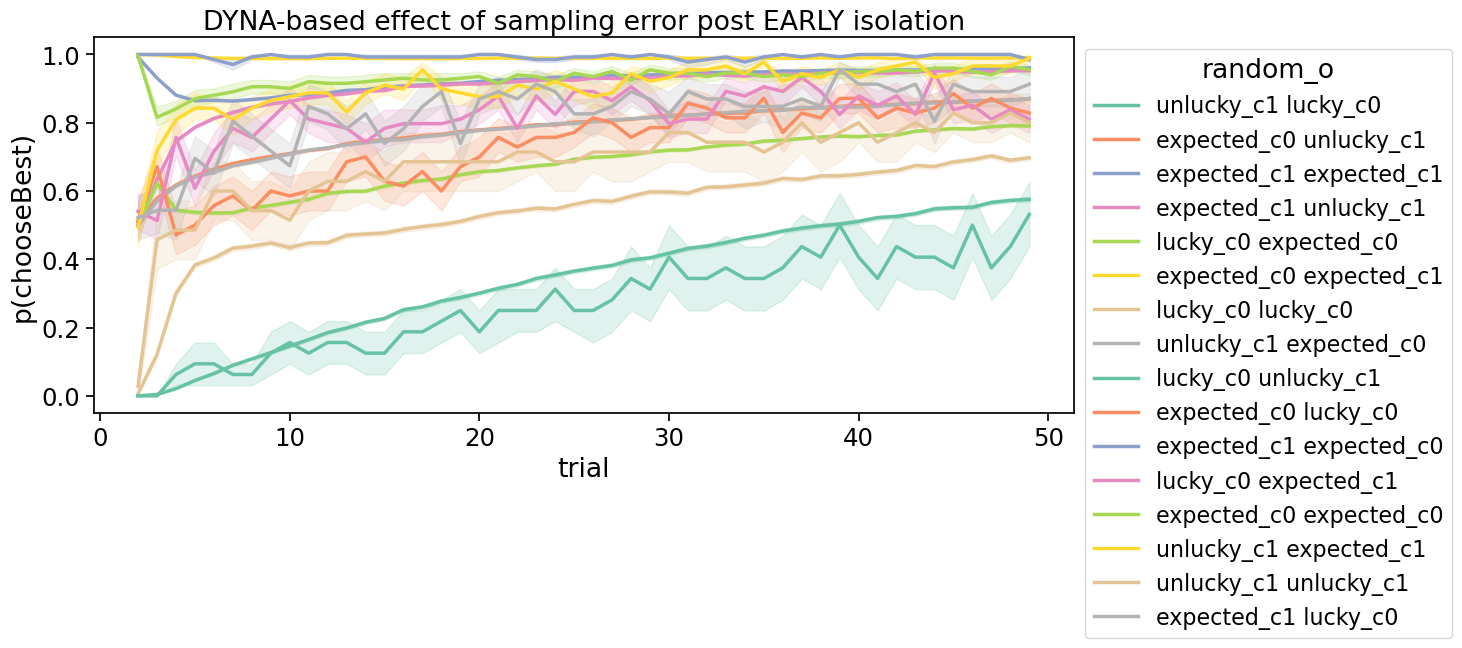

In [146]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.special import logsumexp as smax
import seaborn as sns
import matplotlib.pyplot as plt

probabilities=[0.3,0.6]


trials=50 #online
dyna_trials=100 #offline
episodes=100000 #episodes
replay_trials=[2] #trial at which isolation + DYNA offline learning begins
inv_temp=5

sns.set_context("notebook",font_scale=1.6, rc={"lines.linewidth": 2.5})


def sample_with_exponential_decay(items, decay_rate=0.8):
    # Calculate weights using exponential decay (recent items have higher weights)
    weights = np.array([decay_rate ** (len(items) - 1 - i) for i in range(len(items))])
    probabilities = weights / weights.sum()
    # Select an index based on probabilities
    sampled_index = np.random.choice(len(items), p=probabilities)
    return items[sampled_index]

# Example usage with a list of lists


odict={1:'lucky_c0',-1:'expected_c0',2:'expected_c1',-2:'unlucky_c1'}

columns=['replay_trial','episode','p(chooseBest)','random_o','trial']
data=[]

forgetting_rate=1

types_last_outcome=[]
for replay_trial in replay_trials:
    for episode in range(episodes): 
        experiences={0:0,1:0} #experience for action
        memory=[] # action-outcome memory
        q_values=[0,0]
        recent_outcome=[]
        for trial in range(trials):

            #initiate DYNA offline learning
            if trial==replay_trial:
                
                recent_outcome.append(odict[o1]+' '+odict[o2])
                    
                # #recall choice and outcome
                # sampled = sample_with_exponential_decay(memory, decay_rate=forgetting_rate)
                # choice=sampled[0]
                # o=sampled[1]
                
            
                # #update memory
                # memory.append(sampled)
                # experiences[choice]+=1
            
                # #update q-values
                # q_values[choice]=q_values[choice]+(1/experiences[choice])*(o-q_values[choice])
                
          
            # enact choice via softmax rule
            pchoice=(np.exp(inv_temp*q_values[0])/np.sum(np.exp(inv_temp*np.array(q_values))))
            choice=np.random.choice([0,1],1,p=[pchoice,1-pchoice])[0]

            #generate random outcome given latent reward contingencies
            o=np.random.choice([1,-1],1,p=[probabilities[choice],1-probabilities[choice]])[0]

            #save two most-recent trials most likely to be replayed offline
            if trial==0:
                if choice==1:
                    o1=o*2
                else:
                    o1=o
            elif trial==1:
                if choice==1:
                    o2=o*2
                else:
                    o2=o
                
            #update memory
            memory.append([choice,o])
            experiences[choice]+=1
        
            #update q-values
            q_values[choice]=q_values[choice]+(1/experiences[choice])*(o-q_values[choice])
            data.append([replay_trial,episode,choice,0,trial])

        #save pre-DYNA latest outcomes    
        types_last_outcome.extend(recent_outcome*trials)


#put data in dataframe           
df_results=pd.DataFrame(data=data,columns=columns)
df_results['random_o']=types_last_outcome
df_results=df_results[df_results['trial']>1]


# Set figure size explicitly (wide plot)
plt.figure(figsize=(15, 6))
# Create the plot and assign it to 'ax'
ax = sns.lineplot(
    data=df_results,
    x='trial',
    y='p(chooseBest)',
    ci=68,
    hue='random_o',
    palette='Set2'
)

# Set the title
ax.set_title("DYNA-based effect of sampling error post EARLY isolation")

# Move the legend to the upper left outside the plot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize='small')

# Improve layout
plt.tight_layout()

#save figure
plt.savefig('NoDYNA_impactRandomOutcomes.png',dpi=300,bbox_inches='tight')
# Display the plot
plt.show()